In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from src.EXPM import EXPM
from src.CascadeBandit import CascadeBandit
from src.UCB import UCBM
from env.bandit_env import MAB_Bernoulli
from src.bandit_utils import play_all
from src.UCB import UCBM
from src.comband import CombBand

In [2]:
rng = np.random.default_rng(seed = 42)
T = 100_000
N = 35
K = 20
M = 3

corruption = int(np.sqrt(T))

env = MAB_Bernoulli(K, M, corruption = corruption)

expm = EXPM(K, M)
casc = CascadeBandit(K, M, method='UCB')
casc_kl = CascadeBandit(K, M, method='KL-UCB')
cb = CombBand(K,M)
#
res = play_all(env, [cb, expm, casc, casc_kl], T, N, disable_tqdm_T = True)

Training agent ComBand:   0%|          | 0/35 [00:00<?, ?it/s]

Training agent MSE3:   0%|          | 0/35 [00:00<?, ?it/s]

Training agent Casc-UCB:   0%|          | 0/35 [00:00<?, ?it/s]

Training agent Casc-KL-UCB:   0%|          | 0/35 [00:00<?, ?it/s]

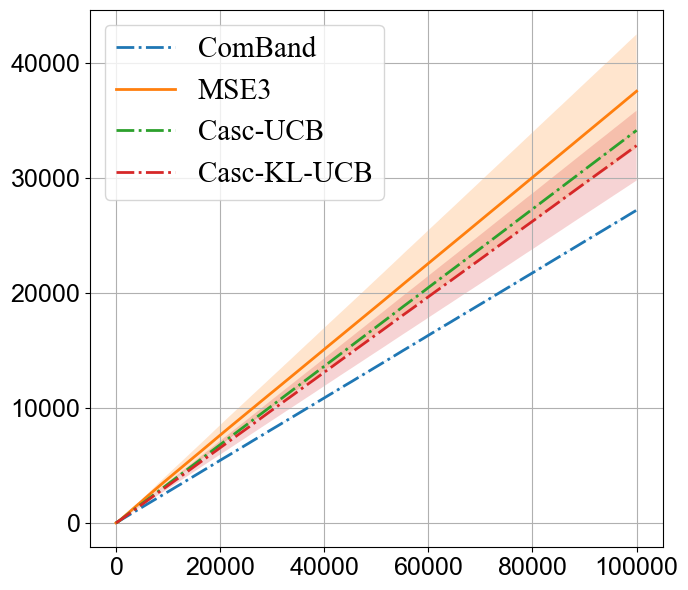

In [16]:
from src.bandit_utils import plot_results
plot_results(res, title = f"Bernoulli rewards: K = {K}; M = {M}; C = {corruption}", path = './results/synth/Corrupted.pdf')